In [10]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# Importing datafile
df = pd.read_csv("MasterDataframe.csv")


In [11]:
# Filter dataframes for outdoor vs indoor stadiums
outdoor_df = df[df["Indoor"] == False]
indoor_df = df[df["Indoor"] == True]

In [12]:
# Renaming Total Points columns to Average as we will extract the mean for cooresponding stadiums types
outdoor_df = outdoor_df.rename (columns= {'Total Points': 'Outdoor Average Points'})
indoor_df = indoor_df.rename (columns= {'Total Points': 'Indoor Average Points'})

In [13]:
# Setting temperature bins and temperature labels
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
outdoor_temp_labels = ["0 to 20 degrees", "20 to 30 degrees", "30 to 40 degrees", "40 to 50 degrees", "50 to 60 degrees",
               "60 to 70 degrees", "70 to 80 degrees", "80 to 90 degrees", "90 to 100 degrees","100 to 110 degrees"]
indoor_temp_labels = ["0 to 20 degrees", "20 to 30 degrees", "30 to 40 degrees", "40 to 50 degrees", "50 to 60 degrees",
               "60 to 70 degrees", "70 to 80 degrees", "80 to 90 degrees", "90 to 100 degrees","100 to 110 degrees"]
pd.cut(outdoor_df["Temp"], bins, labels = outdoor_temp_labels).head(10)
pd.cut(indoor_df["Temp"], bins, labels = indoor_temp_labels).head(10)

2       50 to 60 degrees
6       60 to 70 degrees
7       80 to 90 degrees
12    100 to 110 degrees
14      60 to 70 degrees
17      70 to 80 degrees
18     90 to 100 degrees
30      80 to 90 degrees
33      60 to 70 degrees
38      80 to 90 degrees
Name: Temp, dtype: category
Categories (10, object): [0 to 20 degrees < 20 to 30 degrees < 30 to 40 degrees < 40 to 50 degrees ... 70 to 80 degrees < 80 to 90 degrees < 90 to 100 degrees < 100 to 110 degrees]

In [14]:
# Encountered a warning message from Python, did not apply for my usage so I disabled the warning.
pd.options.mode.chained_assignment = None
outdoor_df["Outdoor Temp Group"] = pd.cut(outdoor_df["Temp"], bins, labels = outdoor_temp_labels)
indoor_df["Indoor Temp Group"] = pd.cut(indoor_df["Temp"], bins, labels = indoor_temp_labels)

In [15]:
outdoor_score_group = outdoor_df.groupby("Outdoor Temp Group")
indoor_score_group = indoor_df.groupby("Indoor Temp Group")

In [16]:
# Gathered the sum of points based on temperature
outdoor_score = (outdoor_score_group["Outdoor Average Points"].mean())
indoor_score = (indoor_score_group["Indoor Average Points"].mean())

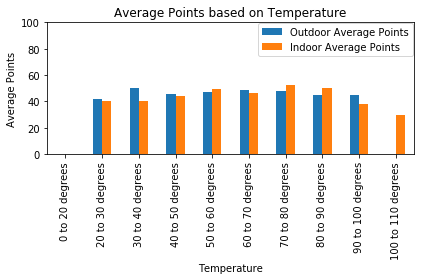

In [17]:
# Merged outdoor and indoor data series and began graphing
game_score = pd.concat([outdoor_score, indoor_score], axis=1)

game_score.plot(kind="bar")
plt.title("Average Points based on Temperature")
plt.xlabel("Temperature")
plt.ylabel("Average Points")
plt.ylim(0, 100)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.1)
plt.tight_layout()
plt.savefig('Averagescoringperformance.png')
plt.show()